## Simple Linear Regression

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("cleaned_algerian_forestfire.csv")

In [3]:
df = df.drop(columns=["Unnamed: 0"])

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [5]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

<AxesSubplot:>

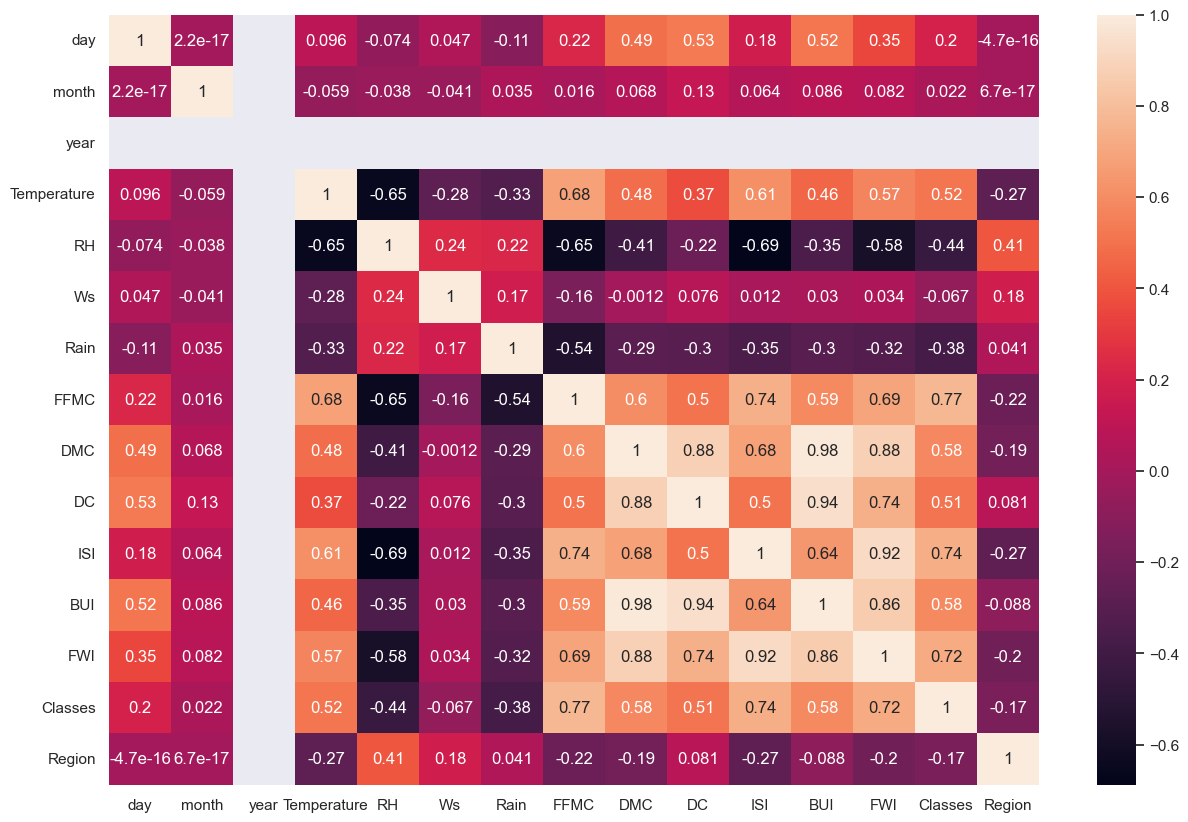

In [6]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

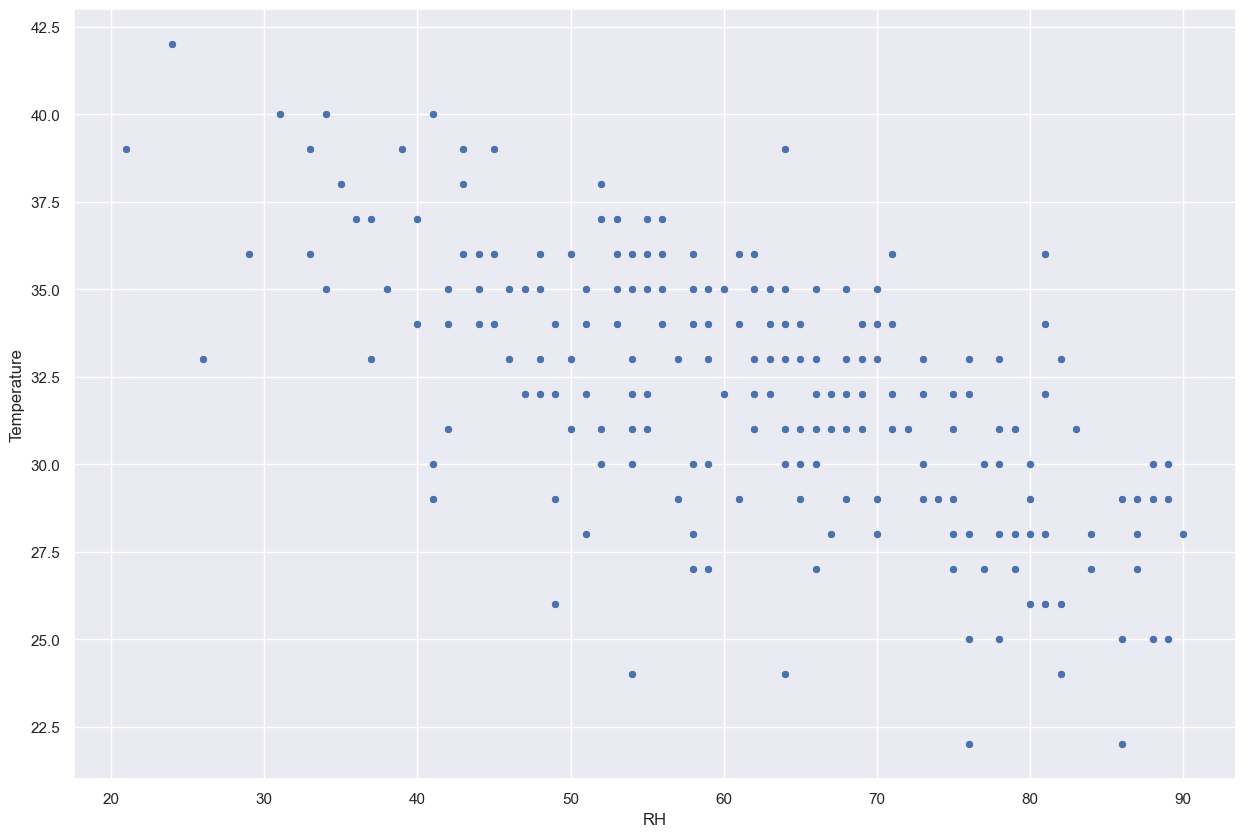

In [7]:
sns.scatterplot(df["RH"],df["Temperature"])

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

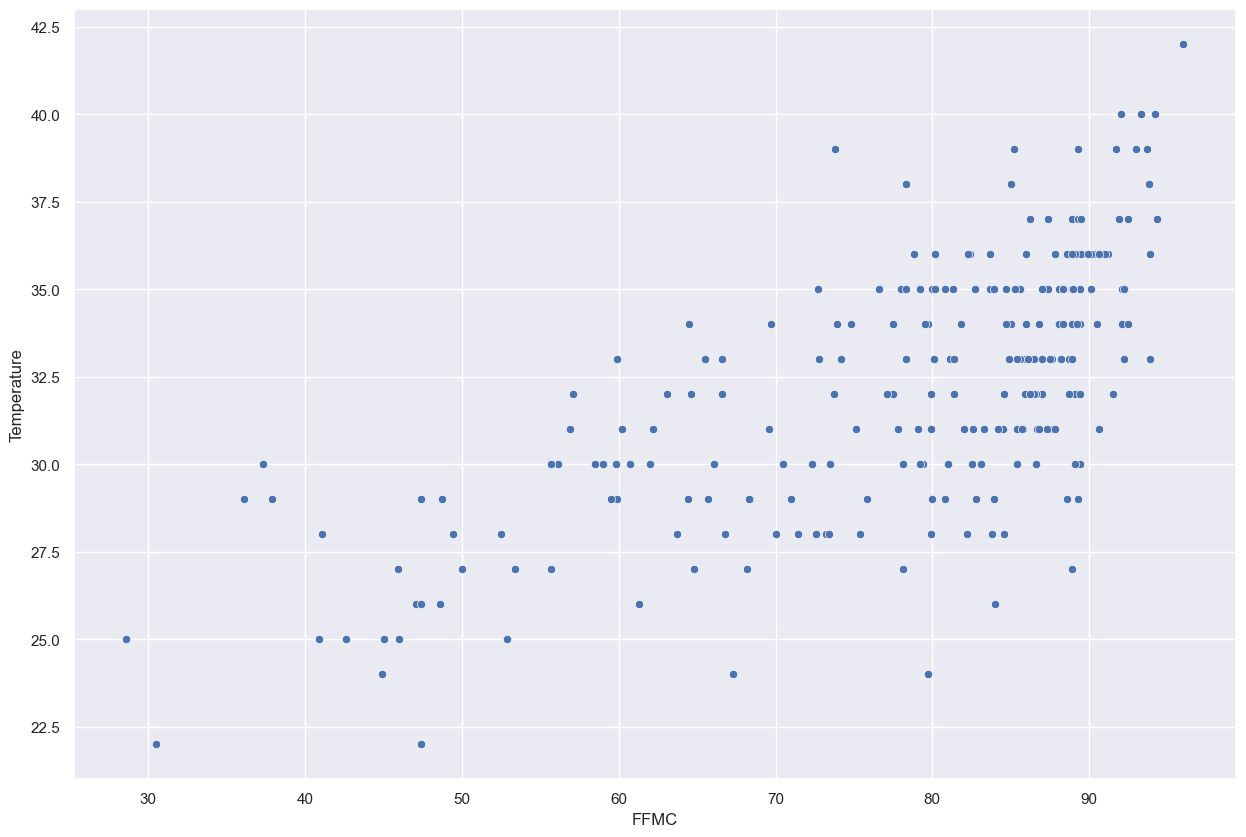

In [8]:
sns.scatterplot(df["FFMC"],df["Temperature"])

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

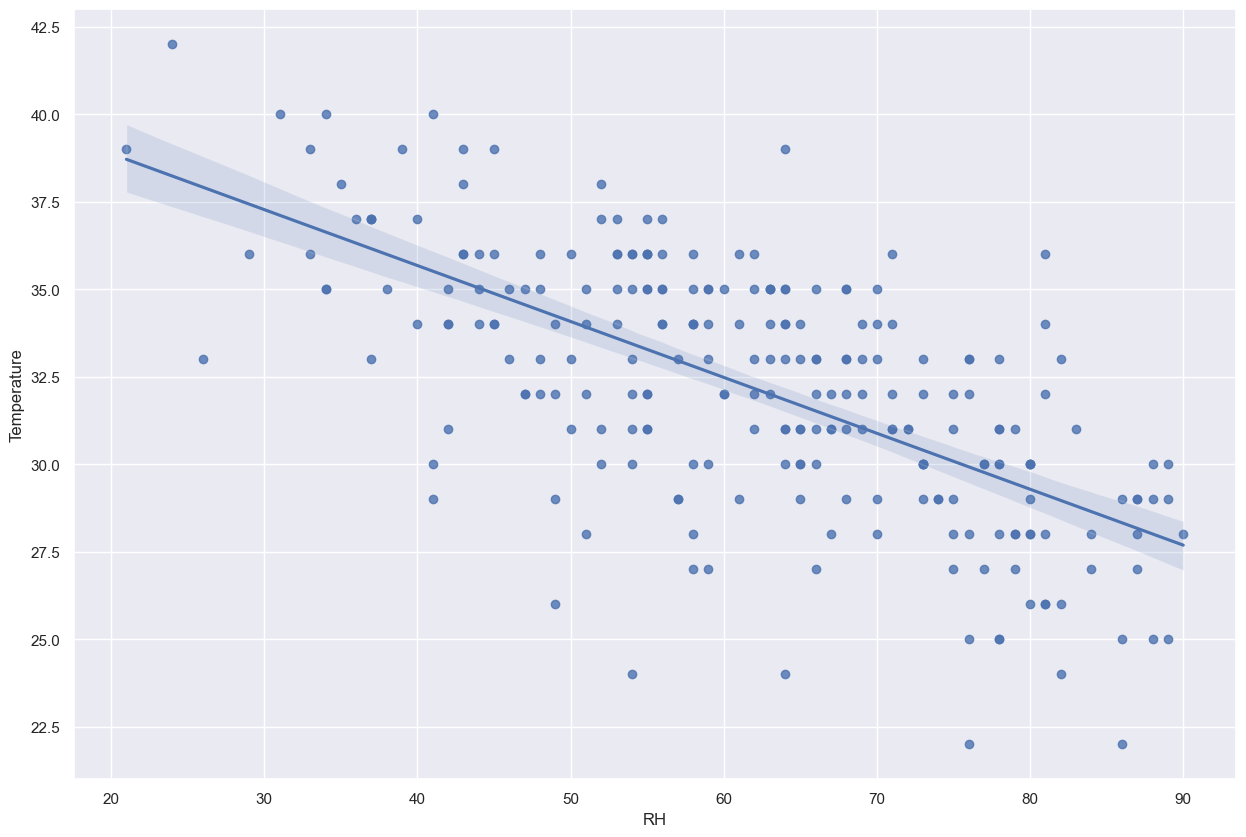

In [9]:
sns.regplot(x="RH",y="Temperature",data=df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

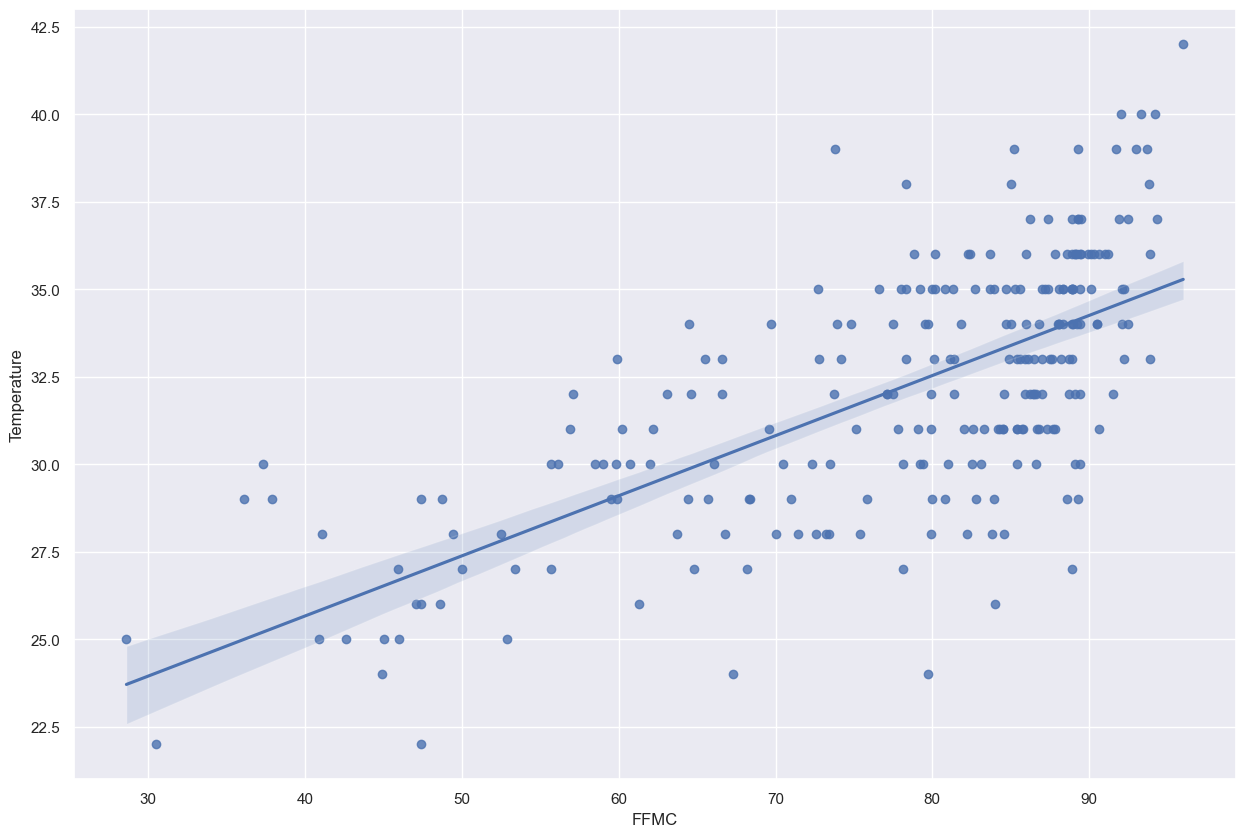

In [10]:
sns.regplot(x="FFMC",y="Temperature",data=df)

<AxesSubplot:xlabel='FFMC'>

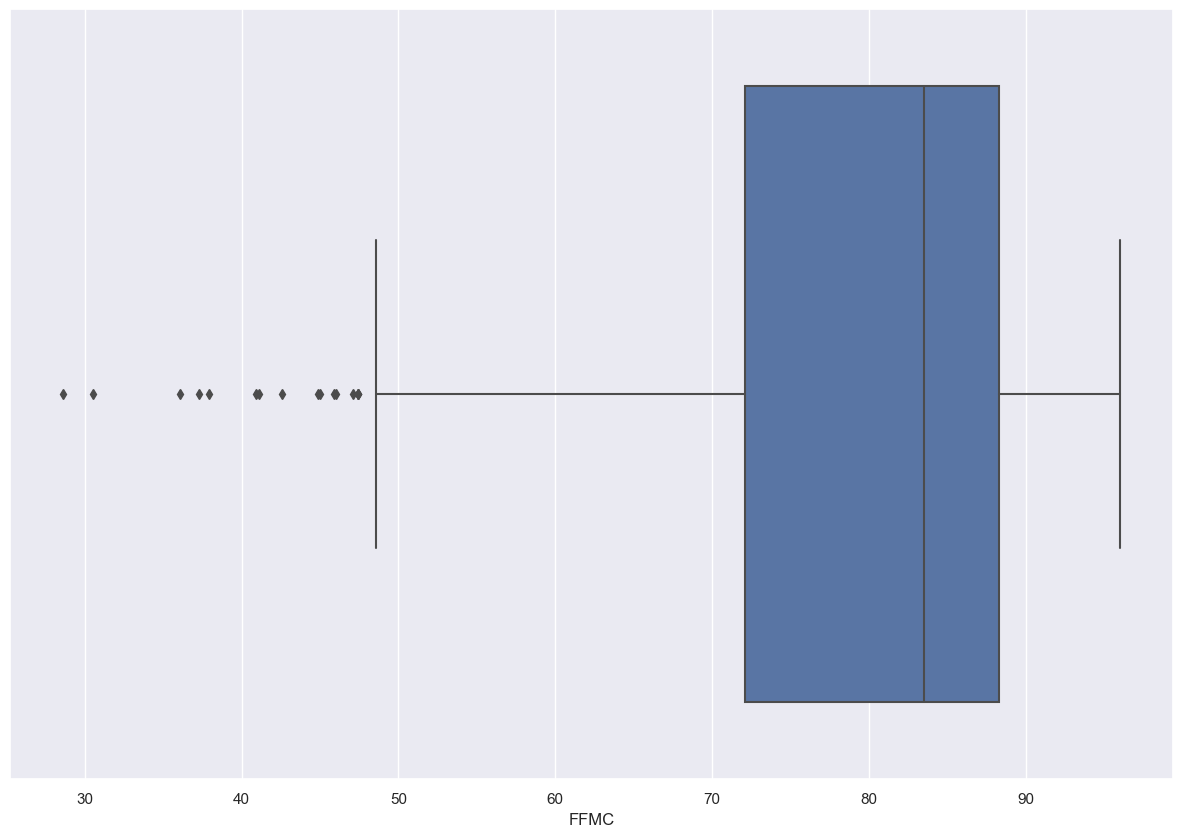

In [11]:
sns.boxplot(df["FFMC"])

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [13]:
X = df.iloc[:,4:-2]
Y = df.iloc[:,3]

In [14]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [15]:
Y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [18]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
114,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
132,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
207,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8
...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
179,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0


In [19]:
Y_train

114    32.0
65     34.0
132    31.0
207    34.0
162    34.0
       ... 
106    24.0
14     28.0
92     25.0
179    33.0
102    30.0
Name: Temperature, Length: 163, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -2.27949356e-01, -6.704542

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X_train,Y_train)

LinearRegression()

In [28]:
print(regression.coef_)

[-1.11905525 -0.45739521  0.09691421  1.67893862  1.07917612  0.72319354
  0.11814242 -1.39324802 -0.05262333]


In [29]:
print(regression.intercept_)

31.98159509202454


In [30]:
prediction = regression.predict(X_test)

In [31]:
prediction

array([33.12113277, 34.27599153, 34.1081232 , 33.4551817 , 36.56742968,
       32.38680838, 35.34162102, 27.3654293 , 30.76167063, 29.53403578,
       29.26453111, 33.18737898, 33.74397562, 33.20293714, 34.15771284,
       32.27376808, 36.88282294, 25.33846086, 32.34613028, 33.72112033,
       30.64422533, 28.39171201, 35.13413644, 28.69736813, 36.33429667,
       26.88918698, 32.89023041, 33.36234711, 33.13267513, 34.69072521,
       34.6296513 , 31.52410657, 32.74168095, 33.33535668, 32.53412299,
       33.19055268, 30.2321709 , 34.50328733, 31.69115187, 23.92788304,
       33.8111882 , 34.00495789, 32.33564172, 24.96891784, 36.16141483,
       32.53768689, 31.24732598, 30.35652666, 35.49132159, 34.70573285,
       36.84582014, 31.16185778, 30.96947655, 34.24806396, 33.85580631,
       32.20004503, 36.68678969, 32.21851926, 30.13805868, 36.56085853,
       33.22333782, 29.95567173, 34.04112054, 32.18632508, 31.67567942,
       24.92633321, 33.25306646, 30.68494645, 36.66003733, 34.72

Text(0, 0.5, 'predicted data')

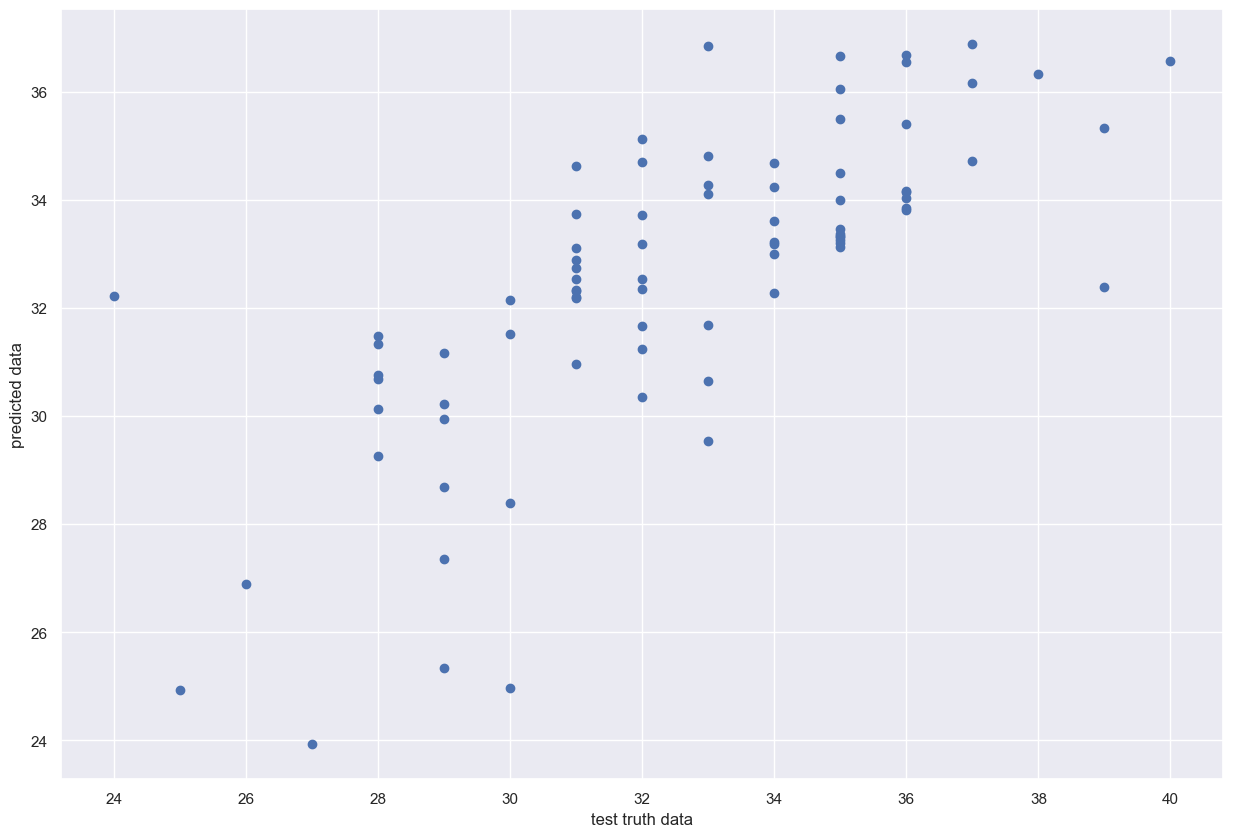

In [32]:
plt.scatter(Y_test,prediction)
plt.xlabel("test truth data")
plt.ylabel("predicted data")

In [33]:
residuals = Y_test-prediction

In [34]:
residuals

24    -2.121133
6     -1.275992
153   -1.108123
211    1.544818
198    3.432570
         ...   
180    0.385233
5     -1.316884
56     0.597095
125   -2.146190
148    1.848947
Name: Temperature, Length: 81, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

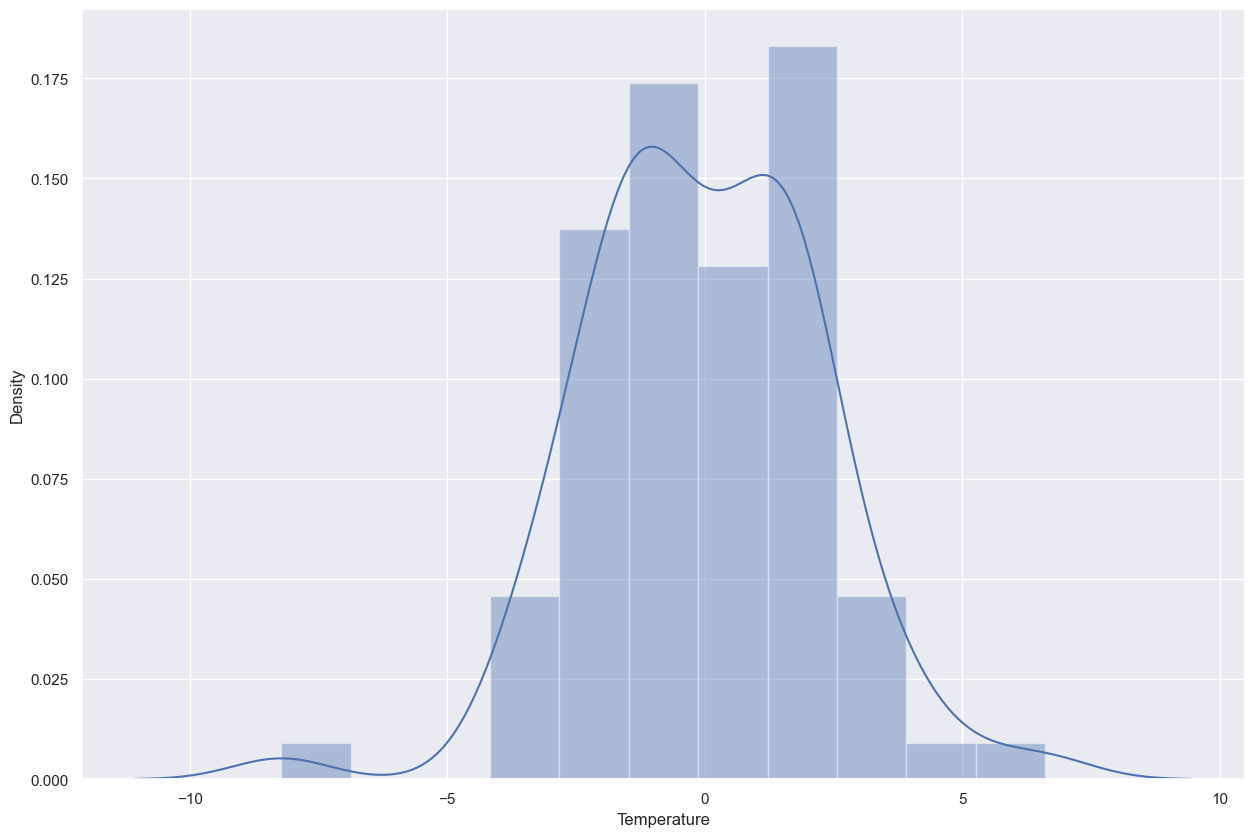

In [35]:
sns.distplot(residuals,kde=True)

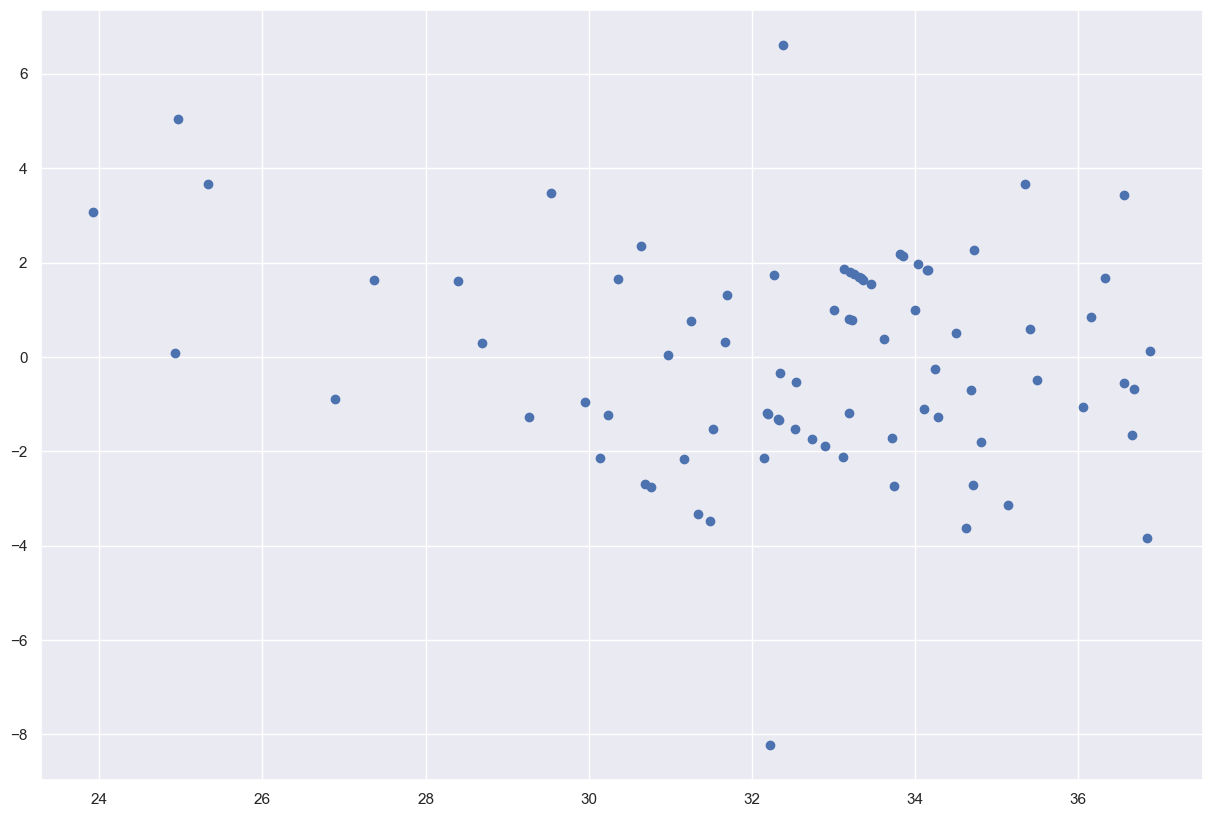

In [36]:
plt.scatter(prediction,residuals)

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(Y_test,prediction))
print(mean_squared_error(Y_test,prediction))
np.sqrt(mean_squared_error(Y_test,prediction))

1.816624554307503
5.14403407342394


2.2680463120103918

In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(Y_test,prediction)

In [40]:
print(score)

0.5210726897157022


In [41]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4603635940458616

## Ridge regression

In [42]:
from sklearn.linear_model import Ridge

In [43]:
r_regression = Ridge()

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [45]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
24,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4
6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
153,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4
211,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9
198,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8
...,...,...,...,...,...,...,...,...,...
180,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9
5,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
56,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3
125,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0


In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -2.27949356e-01, -6.704542

In [49]:
r_regression.fit(X_train,Y_train)

Ridge()

In [50]:
print(r_regression.coef_)

[-1.128844   -0.46133629  0.08183743  1.6314207   0.53993679  0.44532083
  0.16303925 -0.55090562 -0.11702728]


In [51]:
print(r_regression.intercept_)

31.98159509202454


In [52]:
r_prediction = r_regression.predict(X_test)

In [53]:
r_prediction

array([33.12618992, 34.24674   , 34.06922682, 33.42510732, 36.53814134,
       32.42996174, 35.30762891, 27.4057252 , 30.79261446, 29.54793777,
       29.25913293, 33.24772941, 33.71838792, 33.21993484, 34.21546555,
       32.23843379, 36.80045992, 25.41971491, 32.30821218, 33.6815395 ,
       30.62048363, 28.39123683, 35.11991037, 28.71361891, 36.34377989,
       26.9248708 , 32.8908782 , 33.38172768, 33.12033053, 34.62363441,
       34.62800665, 31.51025782, 32.7258902 , 33.39246733, 32.52281669,
       33.20470157, 30.18157071, 34.51169763, 31.65133631, 23.9500916 ,
       33.82657625, 33.98804714, 32.34987969, 25.03226483, 36.09250024,
       32.50666047, 31.21803583, 30.38934469, 35.45342925, 34.68761049,
       36.79108503, 31.12578978, 30.96863631, 34.33251422, 33.84410339,
       32.32887485, 36.68517508, 32.20456918, 30.13608325, 36.54981854,
       33.17022939, 29.95378642, 33.97467454, 32.15149675, 31.69665969,
       24.95146106, 33.24563787, 30.66575481, 36.63611759, 34.74

Text(0, 0.5, 'prediction')

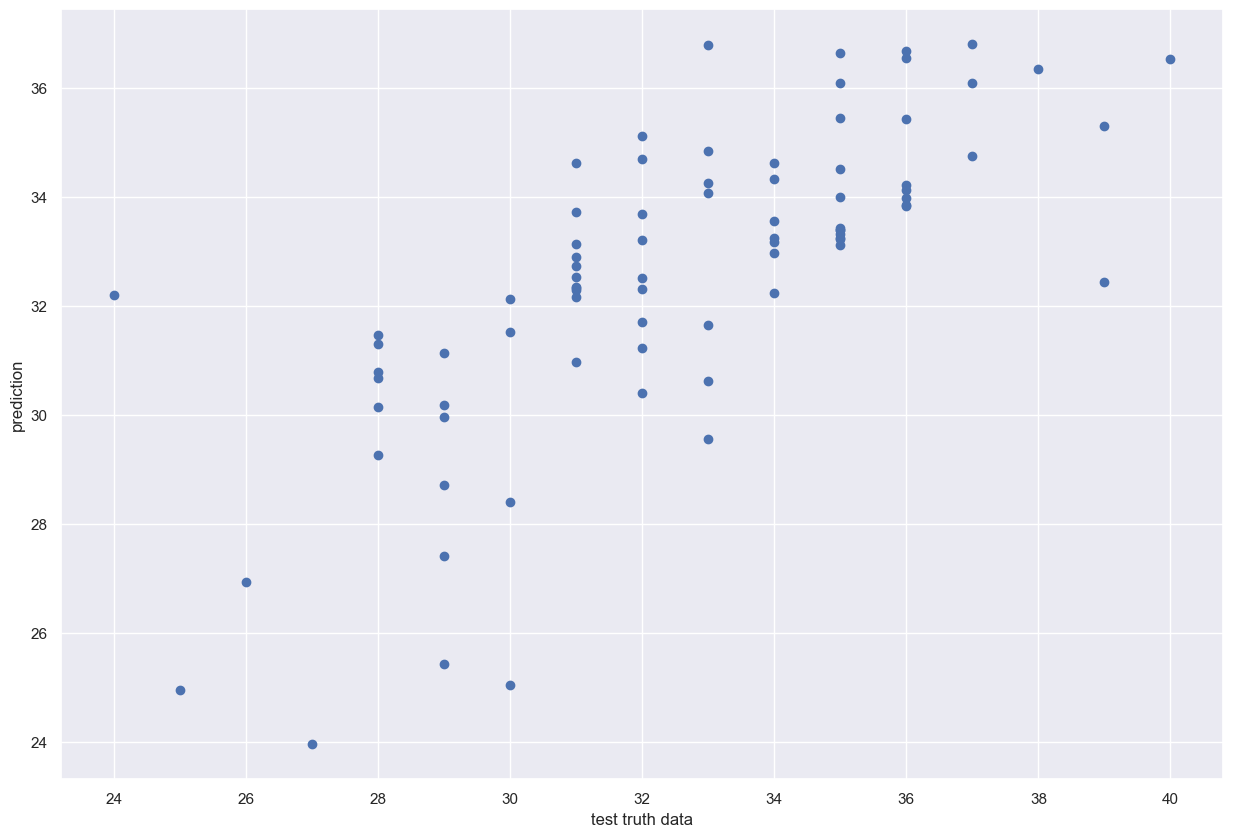

In [54]:
plt.scatter(Y_test,r_prediction)
plt.xlabel("test truth data")
plt.ylabel("prediction")

In [55]:
r_residual = Y_test-r_prediction

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

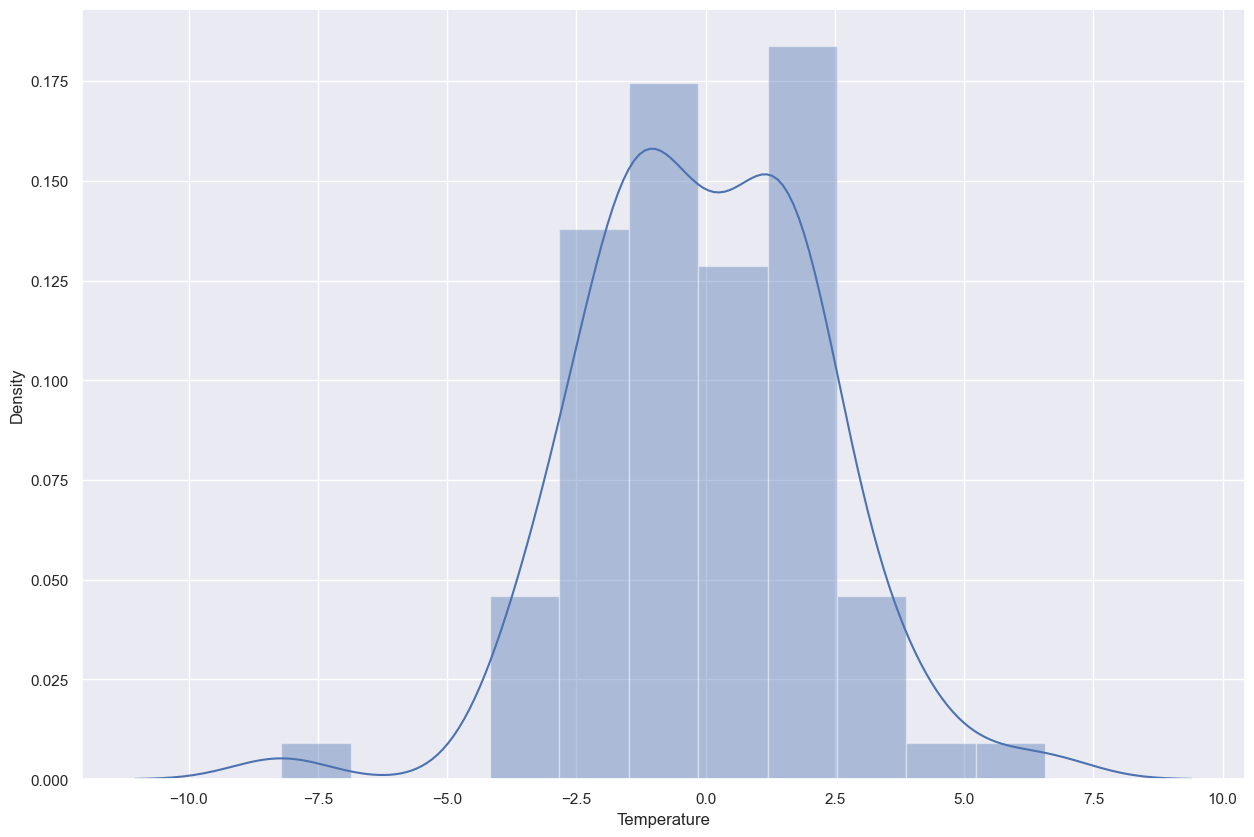

In [56]:
sns.distplot(r_residual,kde=True)

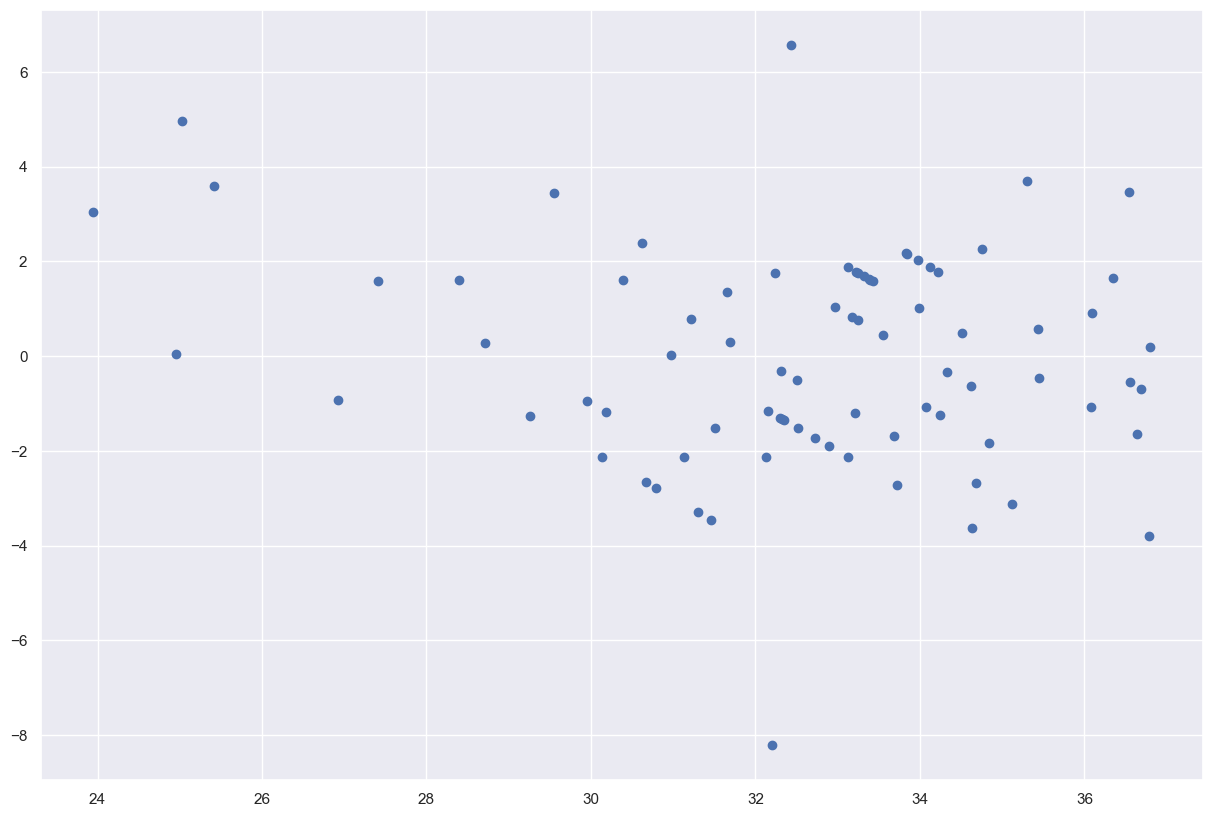

In [57]:
plt.scatter(r_prediction,r_residual)

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(Y_test,r_prediction))
print(mean_squared_error(Y_test,r_prediction))
np.sqrt(mean_squared_error(Y_test,r_prediction))

1.8121778551131855
5.104412604654251


2.2592947139880293

In [59]:
from sklearn.metrics import r2_score

In [60]:
r_score = r2_score(Y_test,r_prediction)

In [61]:
r_score

0.5247615850839147

In [62]:
1 - (1-r_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4645200958691996

## Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

In [64]:
l_regression = Lasso()

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [66]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
114,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
132,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
207,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8
...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
179,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0


In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -2.27949356e-01, -6.704542

In [70]:
l_regression.fit(X_train,Y_train)

Lasso()

In [71]:
print(l_regression.coef_)

[-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.          0.        ]


In [72]:
print(l_regression.intercept_)

31.98159509202454


In [73]:
l_prediction = l_regression.predict(X_test)

Text(0, 0.5, 'predicted da|ta')

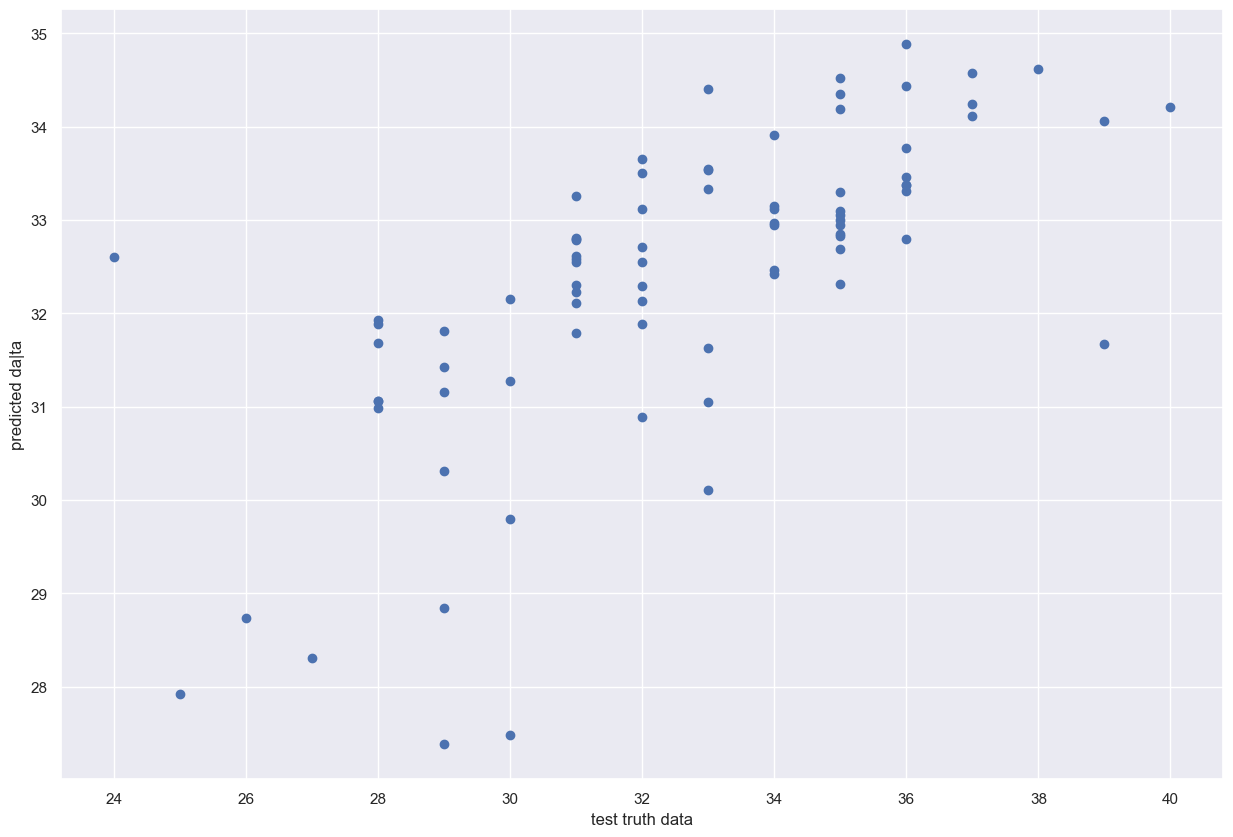

In [74]:
plt.scatter(Y_test,l_prediction)
plt.xlabel("test truth data")
plt.ylabel("predicted da|ta")

In [75]:
l_residual = Y_test-l_prediction

In [76]:
l_residual

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temperature, Length: 81, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

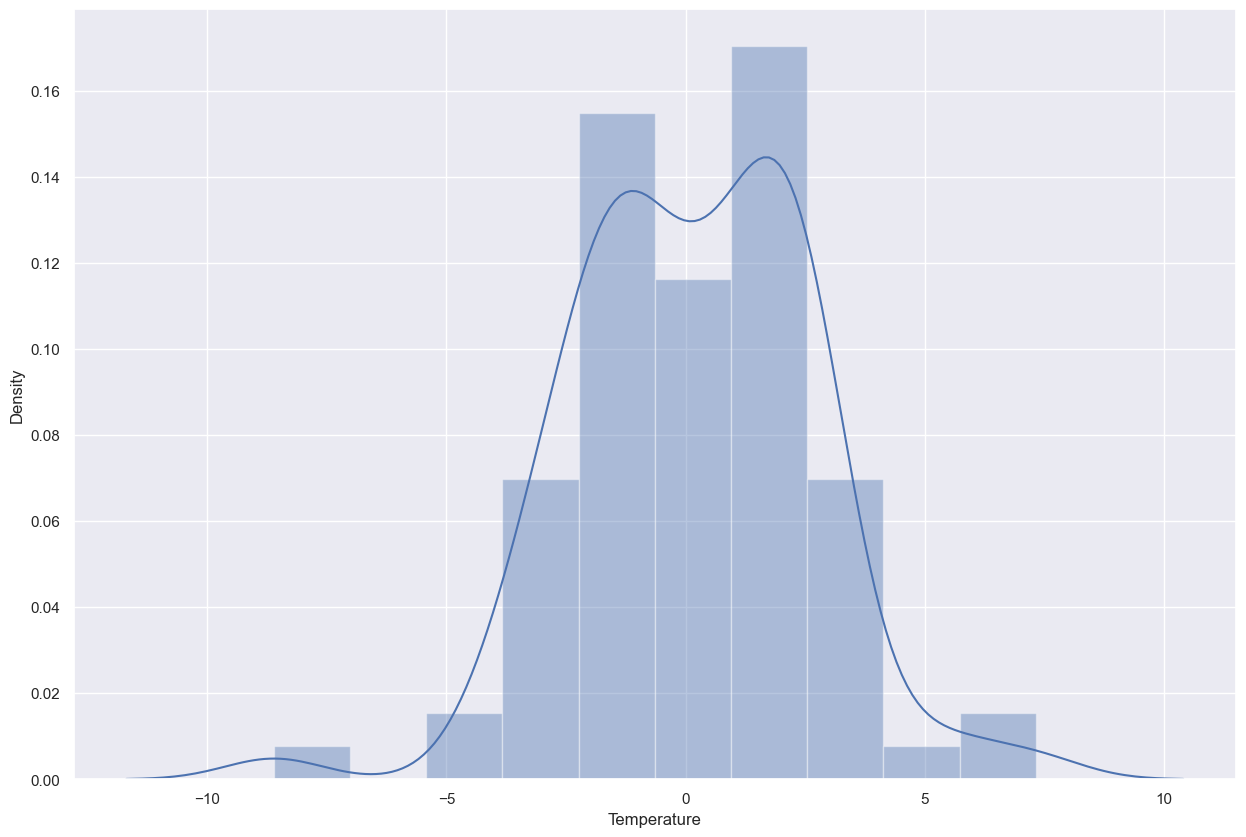

In [77]:
sns.distplot(l_residual,kde=True)

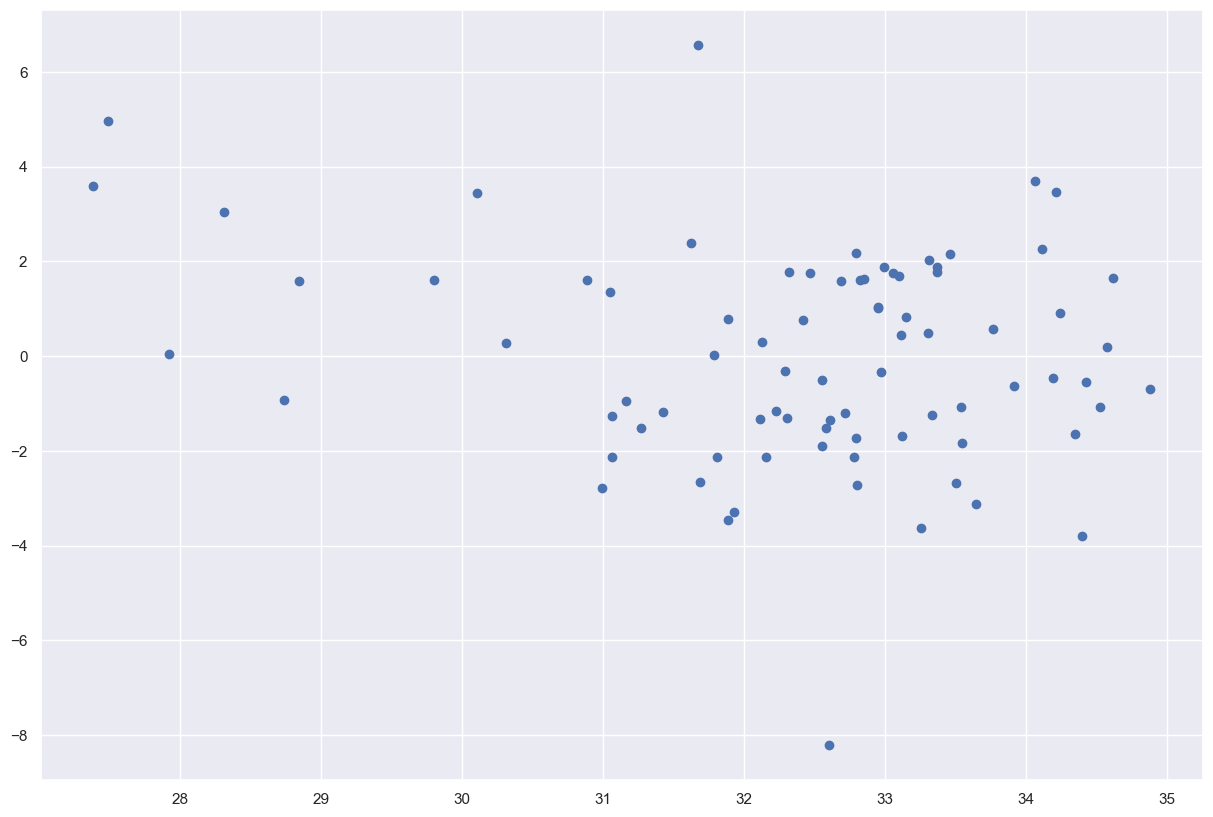

In [78]:
plt.scatter(l_prediction,r_residual)

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(Y_test,l_prediction))
print(mean_squared_error(Y_test,l_prediction))
np.sqrt(mean_squared_error(Y_test,l_prediction))

1.9978776414662665
6.085458745527471


2.4668722596696147

In [80]:
from sklearn.metrics import r2_score

In [81]:
l_score = r2_score(Y_test,l_prediction)

In [82]:
l_score

0.4334228064508907

In [83]:
1 - (1-l_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.36160316219818667